In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
df=df.drop(['country'],axis=1)

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [12]:
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

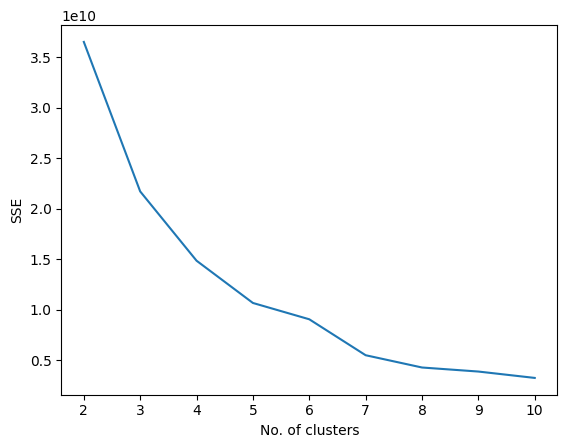

In [13]:
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(2,11),sse)

In [14]:
km_model=KMeans(n_clusters=3)
prediction=km_model.fit_predict(df)
prediction

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [15]:
df['Clusters']=prediction
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [16]:
km_model.cluster_centers_

array([[4.73898437e+01, 3.58656172e+01, 6.33203125e+00, 4.59216086e+01,
        8.56924219e+03, 8.95764844e+00, 6.78734375e+01, 3.26335938e+00,
        4.43839063e+03],
       [6.22857143e+00, 9.64428571e+01, 5.71285714e+00, 6.85714286e+01,
        8.03428571e+04, 6.38871429e+00, 8.02857143e+01, 1.76714286e+00,
        6.54428571e+04],
       [8.80000000e+00, 4.99781250e+01, 8.99156250e+00, 4.60218750e+01,
        3.76218750e+04, 3.38331250e+00, 7.91562500e+01, 1.94468750e+00,
        3.55875000e+04]])

In [20]:
df1=df[df['Clusters']==0]
df2=df[df['Clusters']==1]
df3=df[df['Clusters']==2]

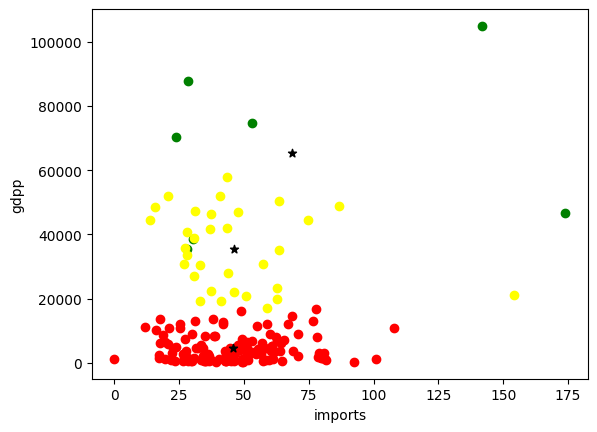

In [22]:
plt.scatter(df1['imports'],df1['gdpp'],color='red')
plt.scatter(df2['imports'],df2['gdpp'],color='green')
plt.scatter(df3['imports'],df3['gdpp'],color='yellow')
plt.xlabel('imports')
plt.ylabel('gdpp')
centers=km_model.cluster_centers_
plt.scatter(centers[:,3],centers[:,8],marker='*',color='black')
